## Sim Demo

### Imports

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from env.imports import *

In [29]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run
from sim.wandb_scrape import *

#### Check job specs

In [30]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 9.7%
RAM Usage: 6.6%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


## Wandb API Query <a id="sims"></a>

Search and plot Random

In [31]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['dynamic_mlp',
          #'shared_transformer', 'shared_transformer_cls', 
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome']
}

cv_type = 'random'
null_model = 'none'
within_last = 90
before_last = -1

# Store summary DataFrames
summary_dict_random = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=random, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=random, null_model=none, feature_type=transcriptome
✓ shared_transformer_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls_pool, cv_type=random, null_model=none, feature_type=transcriptome
✓ shared_transformer_cls_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pca, cv_type=random, null_model=none, feature_type=transcriptome
✓ shared_transformer_pca with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pls, cv_

In [32]:
summary_dict_random

{'dynamic_mlp':         train_geodesic_distance  train_inter_hemi_r  \
 mean                  13.045221            0.989121   
 std                    1.749110            0.007790   
 stderr                 0.276559            0.001232   
 
         train_inter_network_Cerebellum_r  train_inter_network_Cont_r  \
 mean                            0.986691                    0.988765   
 std                             0.009029                    0.007856   
 stderr                          0.001428                    0.001242   
 
         train_inter_network_Default_r  train_inter_network_DorsAttn_r  \
 mean                         0.987417                        0.990935   
 std                          0.008657                        0.005956   
 stderr                       0.001369                        0.000942   
 
         train_inter_network_Limbic_r  train_inter_network_SalVentAttn_r  \
 mean                        0.989348                           0.989090   
 std           

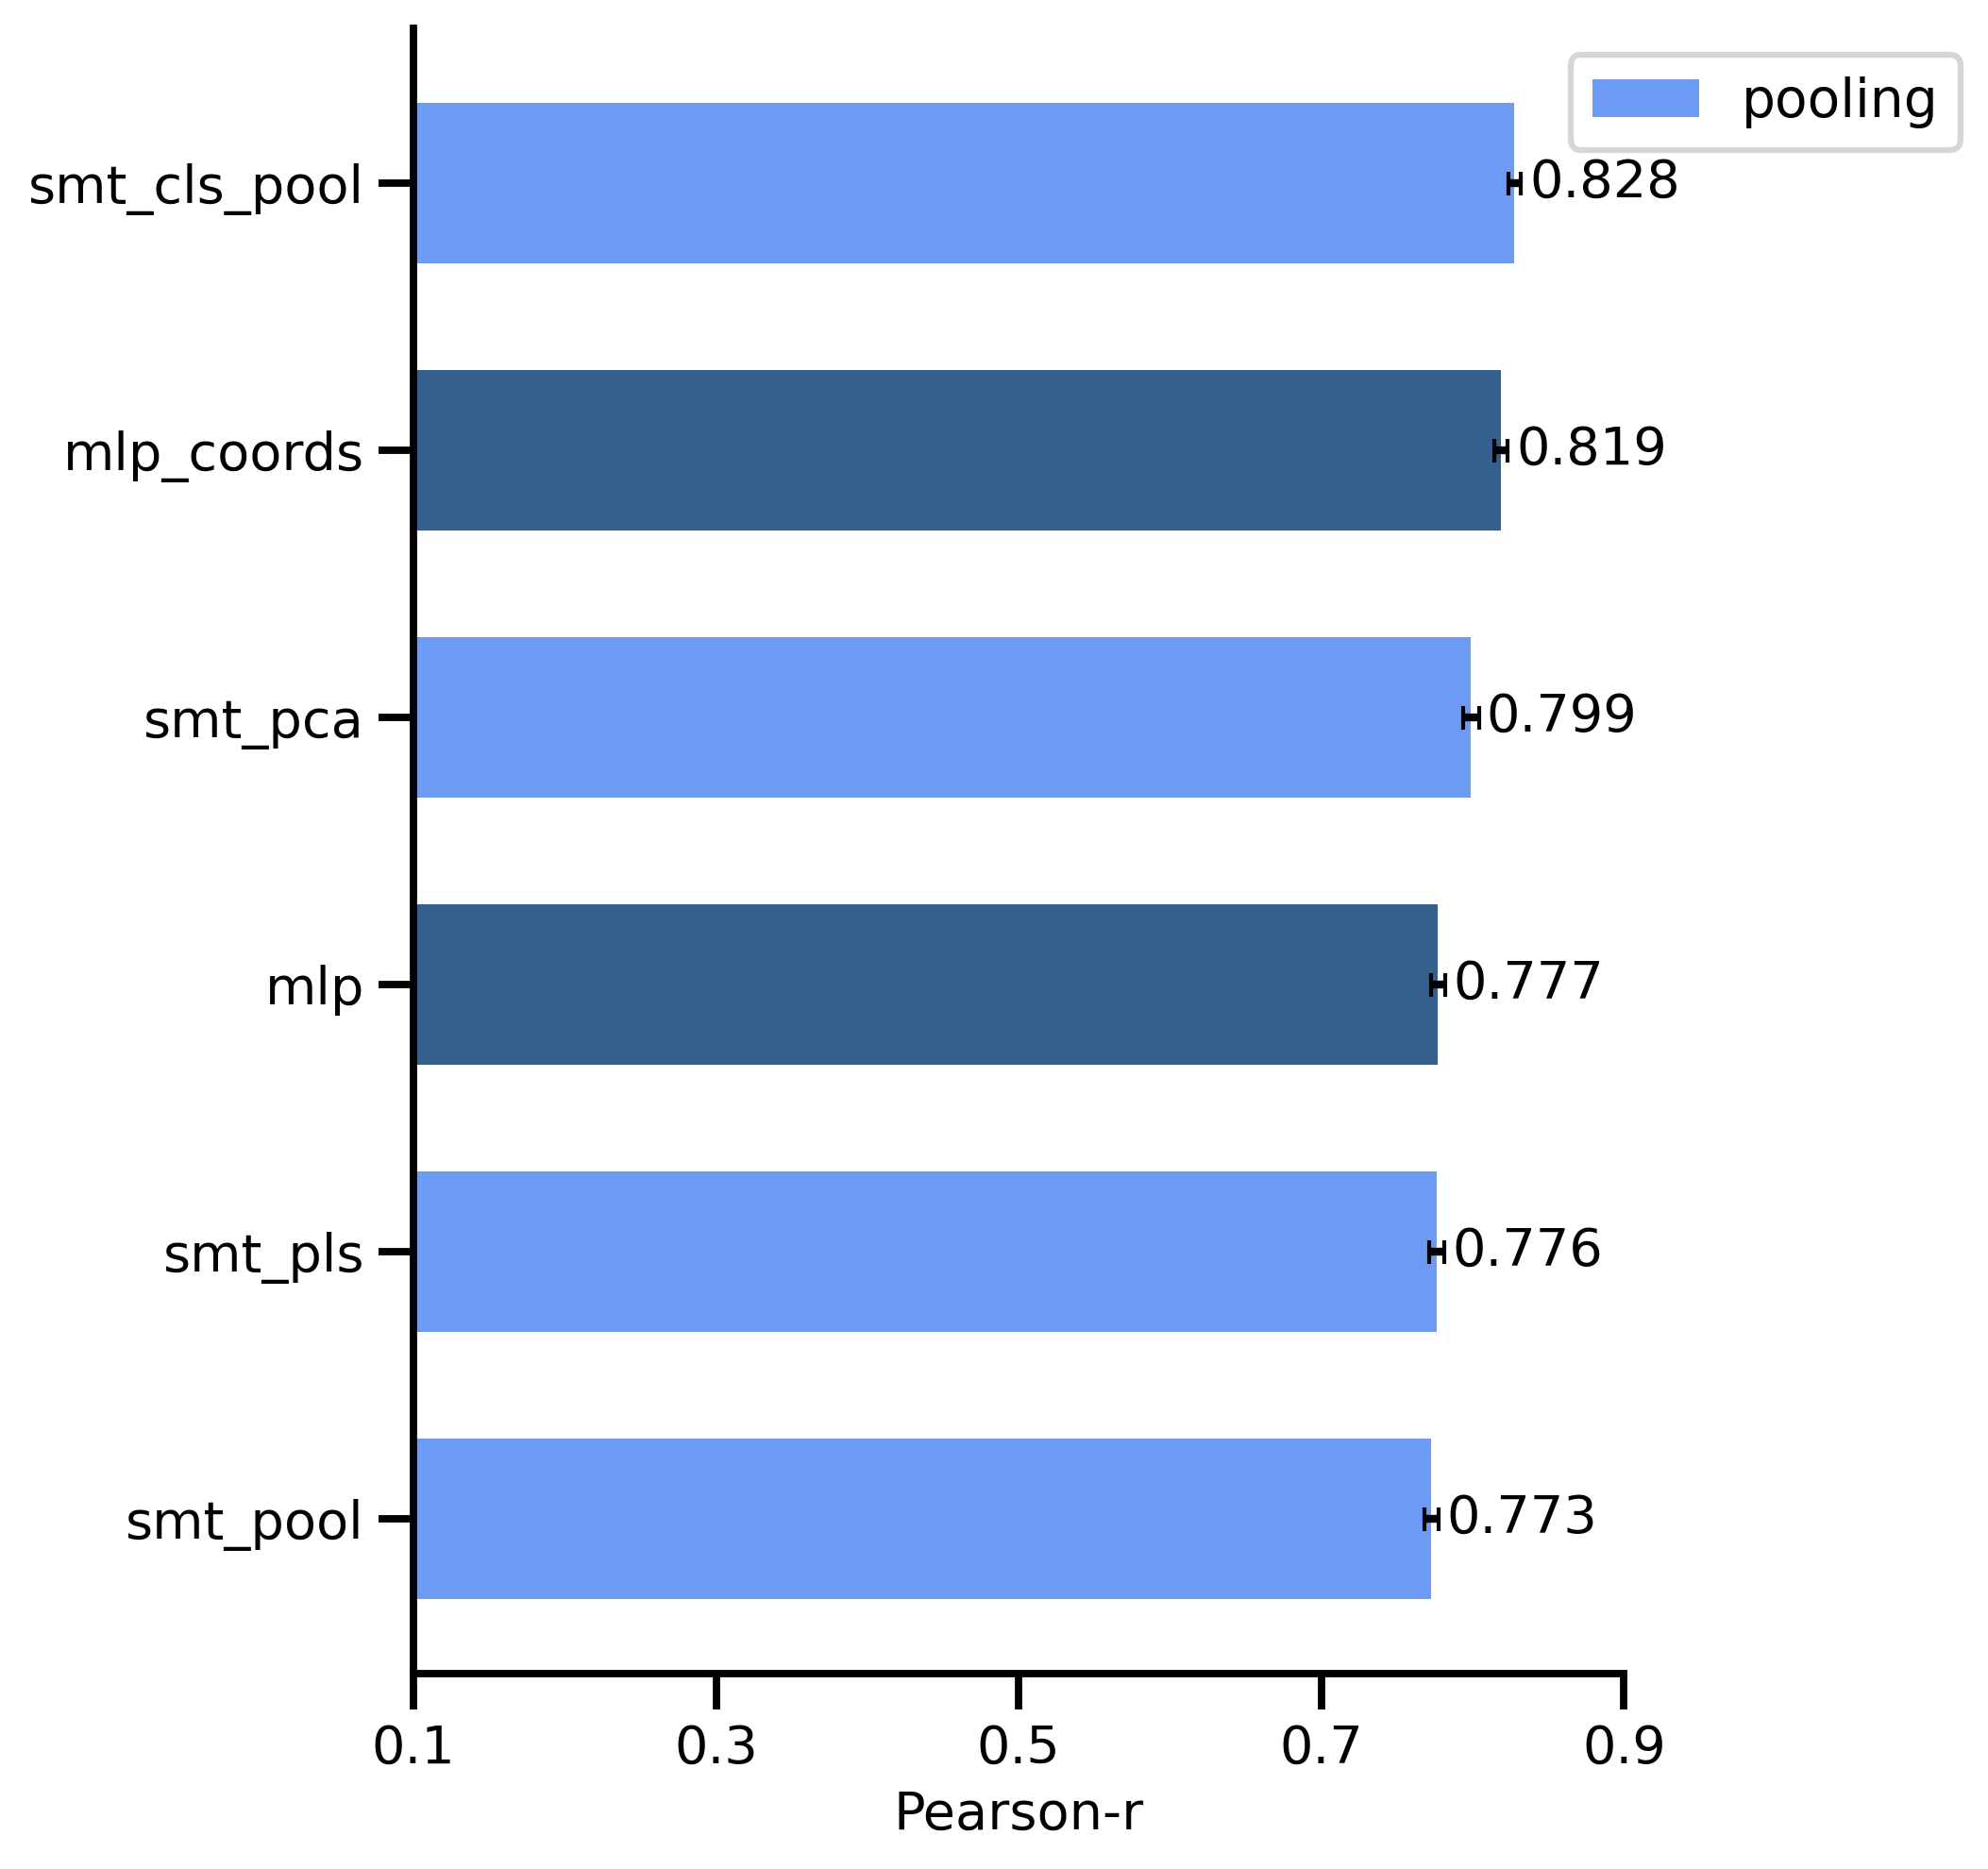

In [33]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae']

plot_model_barchart(summary_dict_random, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')

Search and plot spatial

In [34]:
from collections import defaultdict

# Define model groups and their valid feature types
models = ['dynamic_mlp',
          #'shared_transformer', 'shared_transformer_cls', 
          'shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls', 
          'shared_transformer_conv', 'shared_transformer_ae']

# Dictionary mapping models to their required feature types
model_feature_types = {
    'dynamic_mlp': ['transcriptome', 'transcriptome+euclidean'],
    'shared_transformer': ['transcriptome'],
    'shared_transformer_cls': ['transcriptome'],
    'shared_transformer_pool': ['transcriptome'],
    'shared_transformer_cls_pool': ['transcriptome'],
    'shared_transformer_pca': ['transcriptome'],
    'shared_transformer_pls': ['transcriptome'],
    'shared_transformer_conv': ['transcriptome'],
    'shared_transformer_ae': ['transcriptome']
}

cv_type = 'spatial'
null_model = 'none'
within_last = 90
before_last = -1

# Store summary DataFrames
summary_dict_spatial = {}
process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_spatial, within_last=within_last, before_last=before_last)

# cv_type = 'random'
# null_model = 'spin'

# # Store summary DataFrames
# summary_dict_random_spin = {}
# process_model_feature_combinations(cv_type, null_model, models, model_feature_types, summary_dict_random_spin, within_last=within_last, before_last=before_last)

Checking which model/feature type combinations return 40 runs for null_model=none:

🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ dynamic_mlp: Successfully found 40 runs
🔍 Fetching runs for: model=dynamic_mlp, cv_type=spatial, null_model=none, feature_type=transcriptome+euclidean
✓ dynamic_mlp_coords: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ shared_transformer_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_cls_pool, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ shared_transformer_cls_pool with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pca, cv_type=spatial, null_model=none, feature_type=transcriptome
✓ shared_transformer_pca with transcriptome: Successfully found 40 runs
🔍 Fetching runs for: model=shared_transformer_pls

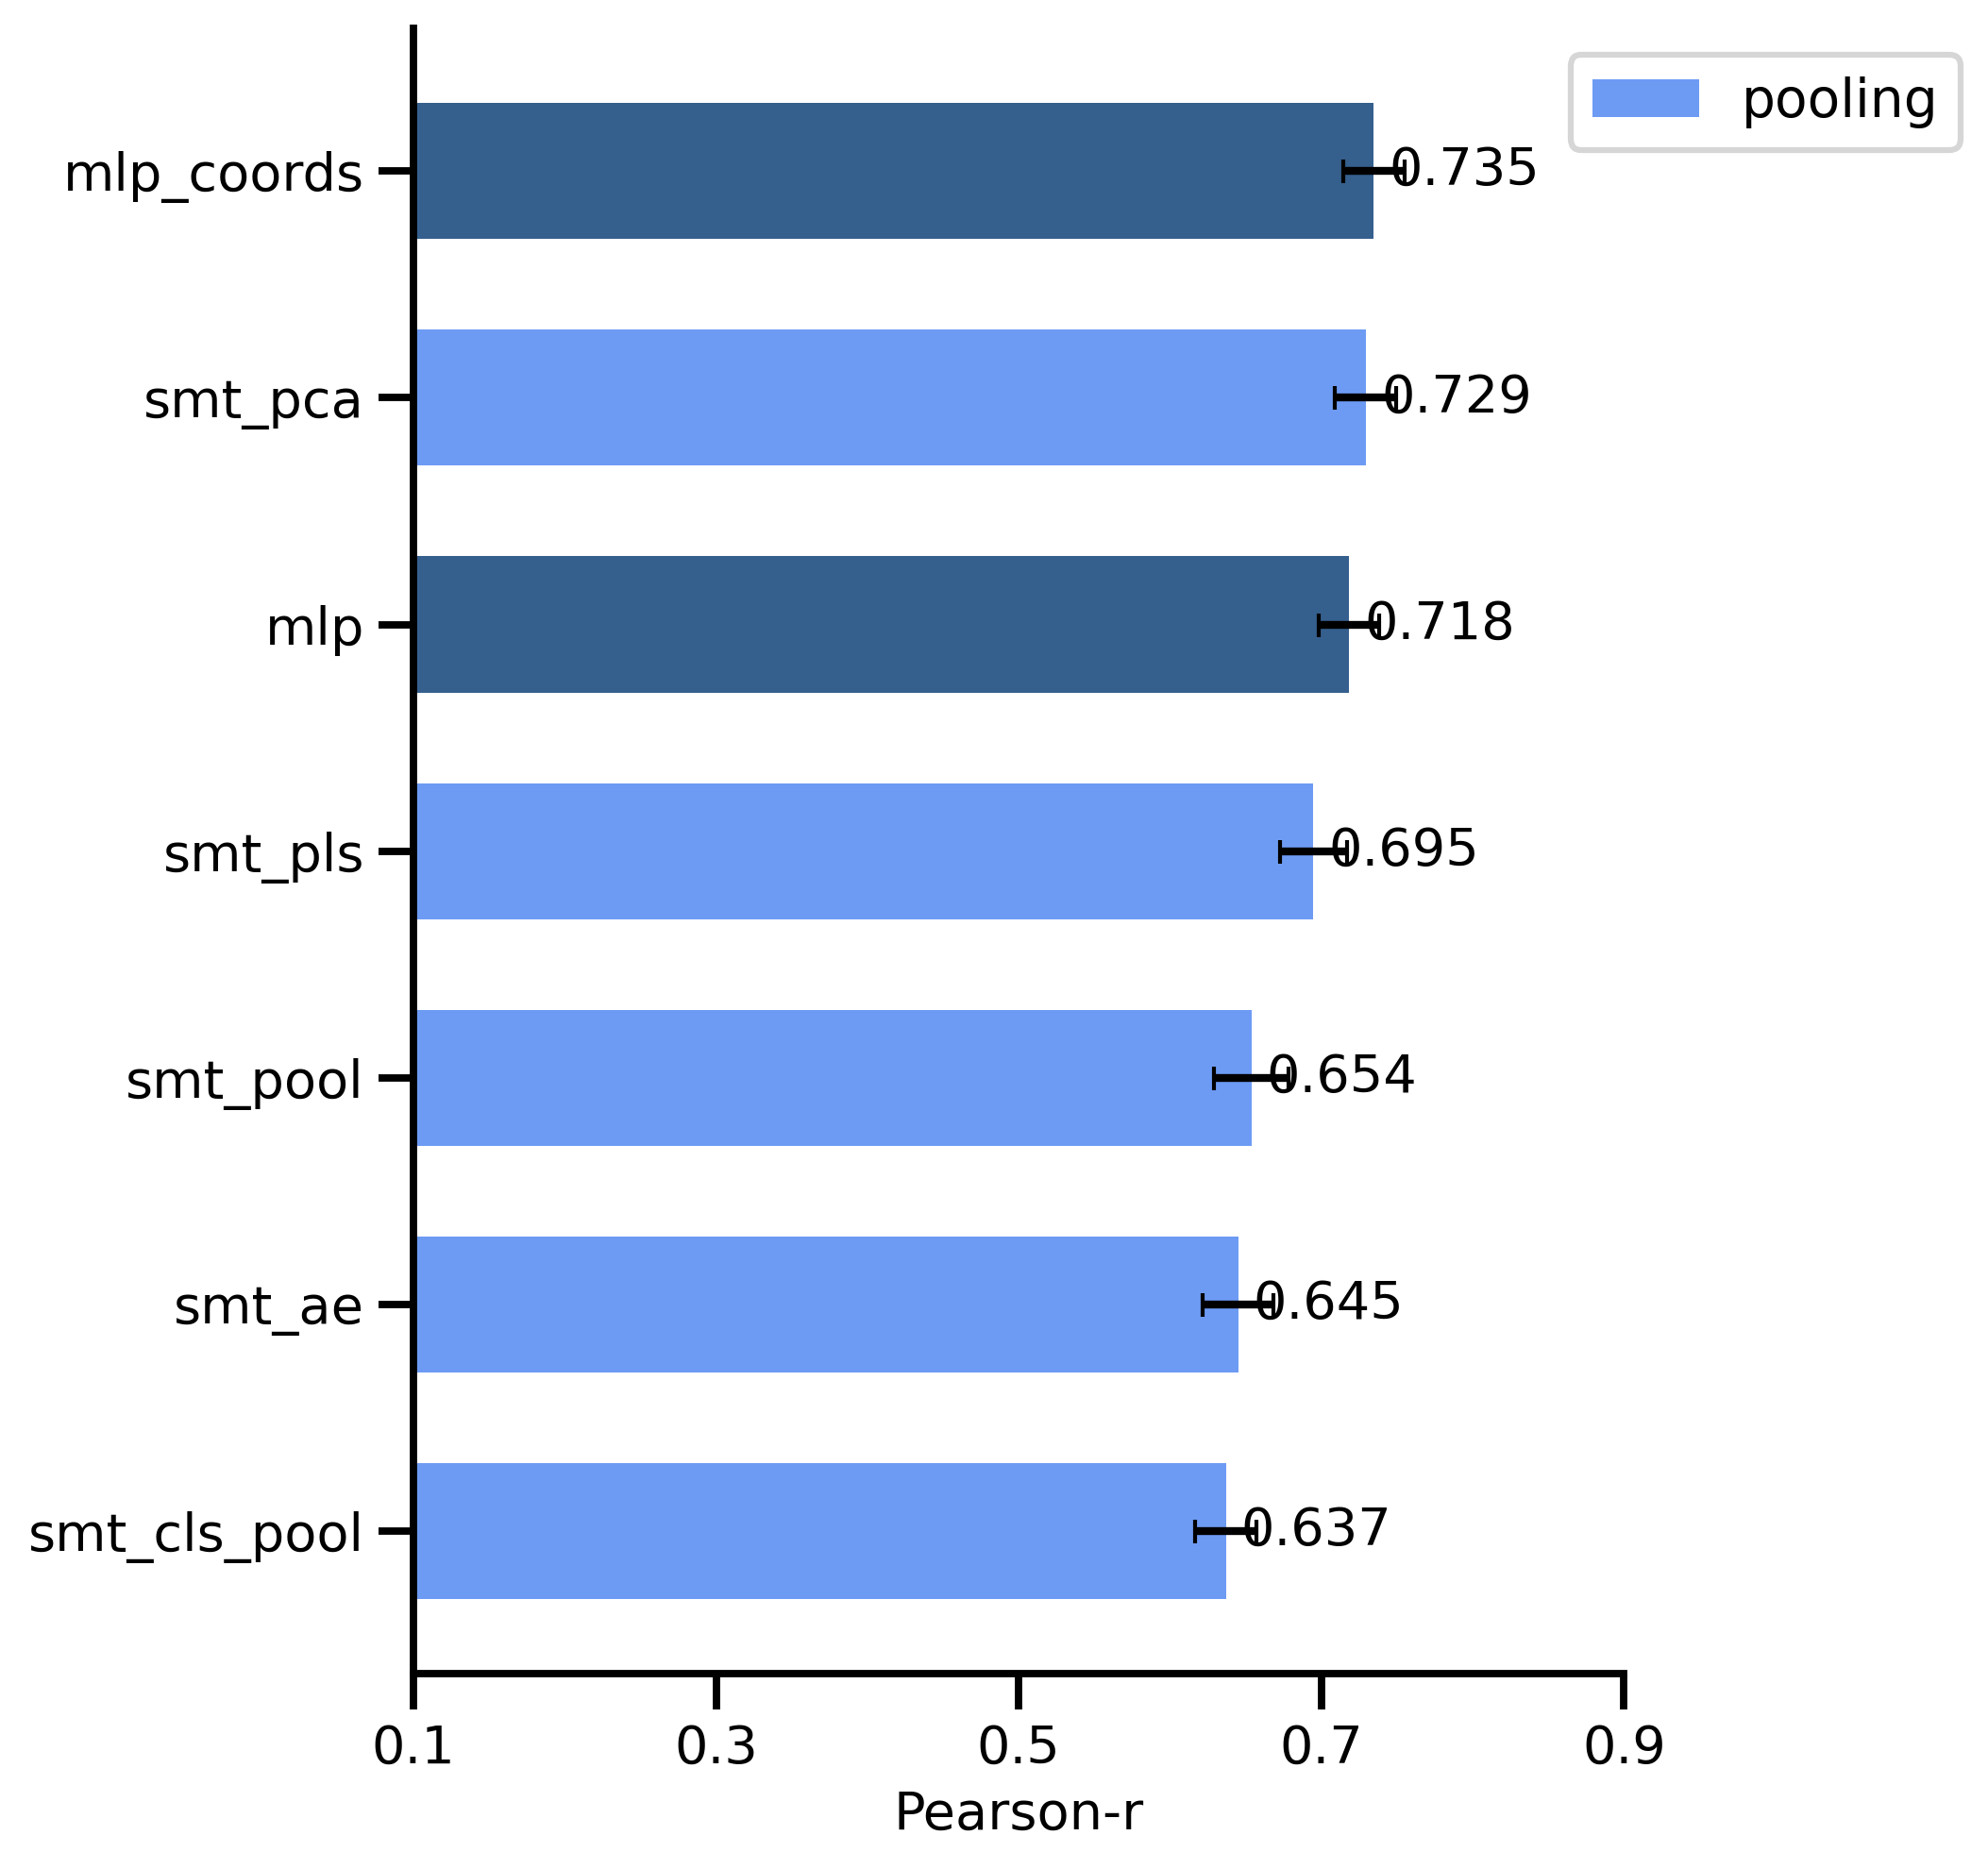

In [35]:
highlight_models = ['shared_transformer_pool', 'shared_transformer_cls_pool',
          'shared_transformer_pca', 'shared_transformer_pls',  'shared_transformer_ae']

plot_model_barchart(summary_dict_spatial, metric="test_pearson_r", xlim=(0.1, 0.9), highlight_models=highlight_models, highlight_label='pooling')